# TAREA
Usar la funcion downloader_data dentro de un notebook de jupyter

In [1]:
# Import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Data frame
df = pd.read_csv('tmp/Ejemplo_01_Laptops_Dataset.csv')

In [3]:
# Imprimir encabezado
df.head()

,brand,name,price,spec_score,user_votes,user_rating,os,utility: Business,utility: Everyday Use,utility: Performance,...,processor_gen,processor_brand,processor_core,base_processor_speed_GHz,turbo_processor_speed_GHz,no_cores,cache_memory_mb,graphics_brand,rom_capacity_gb,internal_memory_gb
0,hp,Victus 15-fb0157AX Gaming,49800.0,70.0,97.0,4.3,windows 11,0,0,0,...,5.0,amd,Ryzen 5,3.3,4.2,6.0,16.0,amd,8.0,512.0
1,xiaomi,Redmi G Pro 2024 Gaming,102990.0,78.0,71.0,4.3,windows 11,0,0,0,...,14.0,intel,Core i9,2.2,5.8,24.0,36.0,nvidia,16.0,1024.0
2,tecno,Megabook T1,23990.0,56.0,177.0,4.4,windows 11,0,0,1,...,11.0,intel,Core i3,3.0,4.1,2.0,6.0,intel,8.0,512.0
3,samsung,Galaxy Book2 Pro 13,62990.0,60.0,1511.0,4.5,windows 11,0,1,0,...,12.0,intel,Core i5,1.7,4.4,12.0,12.0,intel,16.0,512.0
4,apple,MacBook Air 2020 MGND3HN,79990.0,43.0,20380.0,4.7,mac,0,0,1,...,1.0,apple,NaN,NaN,3.2,8.0,NaN,apple,8.0,256.0


In [4]:
# Determinar rango de datos
rango = df['price'].max() - df['price'].min()
print(rango)

591990.0


In [5]:
# Extraer el numero de intervalos
n_clases = 1 * 3.322 * (df['price'].count() ** (1/3))
print(n_clases)

33.18674672452235


In [6]:
# Determinar la amplitud
amplitud = rango / n_clases
print(amplitud)

17838.14499547094


In [7]:
# Definir limites de los intervalos
limites = [df['price'].min() + i * amplitud for i in range(int(n_clases) + 1)]
print(limites)

[np.float64(8000.0), np.float64(25838.14499547094), np.float64(43676.28999094188), np.float64(61514.434986412816), np.float64(79352.57998188375), np.float64(97190.7249773547), np.float64(115028.86997282563), np.float64(132867.01496829657), np.float64(150705.1599637675), np.float64(168543.30495923845), np.float64(186381.4499547094), np.float64(204219.59495018033), np.float64(222057.73994565126), np.float64(239895.8849411222), np.float64(257734.02993659314), np.float64(275572.1749320641), np.float64(293410.319927535), np.float64(311248.46492300596), np.float64(329086.6099184769), np.float64(346924.75491394784), np.float64(364762.8999094188), np.float64(382601.0449048897), np.float64(400439.18990036065), np.float64(418277.3348958316), np.float64(436115.47989130253), np.float64(453953.62488677347), np.float64(471791.7698822444), np.float64(489629.91487771535), np.float64(507468.0598731863), np.float64(525306.2048686573), np.float64(543144.3498641282), np.float64(560982.494859599), np.float

In [8]:
# Definir los puntos medios
marcas = [(limites[i] + limites[i + 1]) / 2 for i in range(int(n_clases))]
print(marcas)

[np.float64(16919.07249773547), np.float64(34757.21749320641), np.float64(52595.36248867735), np.float64(70433.50748414829), np.float64(88271.65247961922), np.float64(106109.79747509016), np.float64(123947.9424705611), np.float64(141786.08746603204), np.float64(159624.23246150298), np.float64(177462.37745697392), np.float64(195300.52245244486), np.float64(213138.6674479158), np.float64(230976.81244338673), np.float64(248814.95743885767), np.float64(266653.10243432864), np.float64(284491.2474297995), np.float64(302329.3924252705), np.float64(320167.5374207414), np.float64(338005.6824162124), np.float64(355843.8274116833), np.float64(373681.9724071543), np.float64(391520.11740262515), np.float64(409358.26239809615), np.float64(427196.40739356703), np.float64(445034.552389038), np.float64(462872.6973845089), np.float64(480710.8423799799), np.float64(498548.9873754508), np.float64(516387.1323709218), np.float64(534225.2773663928), np.float64(552063.4223618635), np.float64(569901.5673573345

In [9]:
# Tabla de frecuencia con datos numericos de los limites
tabla_frecuencias_num = pd.DataFrame({
    'Intervalo_de_clases': [f'({round(limites[i], 2)} - {round(limites[i + 1], 2)})' for i in range(int(n_clases))],
    'Marca_de_clase': [round(marcas[i], 2) for i in range(int(n_clases))],
    'Frecuencia_absoluta': [((df['price'] >= limites[i]) & (df['price'] < limites[i +1])).sum() for i in range(int(n_clases))],
    'Frecuencia_relativa': [((df['price'] >= limites[i]) & (df['price'] < limites[i +1])).sum() / df['price'].count() for i in range(int(n_clases))]
})

nombre='Galileo'
print(type(nombre))
entero = 35
print(type(entero))
print(type(tabla_frecuencias_num))
tabla_frecuencias_num

<class 'str'>
<class 'int'>
<class 'pandas.core.frame.DataFrame'>


,Intervalo_de_clases,Marca_de_clase,Frecuencia_absoluta,Frecuencia_relativa
0,(8000.0 - 25838.14),16919.07,44,0.044132
1,(25838.14 - 43676.29),34757.22,183,0.183551
2,(43676.29 - 61514.43),52595.36,240,0.240722
3,(61514.43 - 79352.58),70433.51,169,0.169509
4,(79352.58 - 97190.72),88271.65,114,0.114343
5,(97190.72 - 115028.87),106109.80,72,0.072217
6,(115028.87 - 132867.01),123947.94,31,0.031093
7,(132867.01 - 150705.16),141786.09,33,0.033099
8,(150705.16 - 168543.3),159624.23,26,0.026078
9,(168543.3 - 186381.45),177462.38,17,0.017051


In [10]:
# Tabla de frecuencias
tabla_frecuencias_num.head().sort_values(by='Frecuencia_absoluta', ascending=False)

,Intervalo_de_clases,Marca_de_clase,Frecuencia_absoluta,Frecuencia_relativa
2,(43676.29 - 61514.43),52595.36,240,0.240722
1,(25838.14 - 43676.29),34757.22,183,0.183551
3,(61514.43 - 79352.58),70433.51,169,0.169509
4,(79352.58 - 97190.72),88271.65,114,0.114343
0,(8000.0 - 25838.14),16919.07,44,0.044132


# Visualizacion

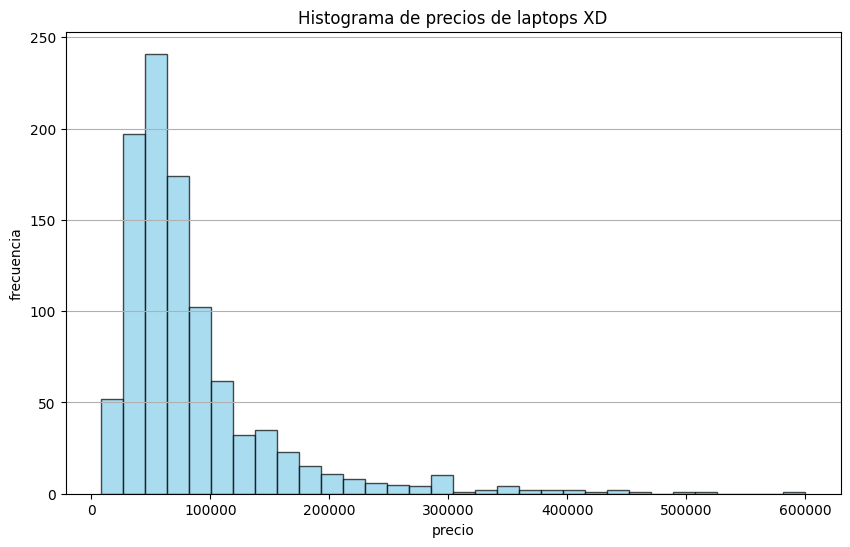

In [18]:
# Configuracion de histograma
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=32, color='skyblue', edgecolor='black', alpha=0.7)

# Etiquetas / titulos
plt.title('Histograma de precios de laptops XD')
plt.xlabel('precio')
plt.ylabel('frecuencia')
plt.grid(axis='y')

# Mostrar histograma
plt.show()

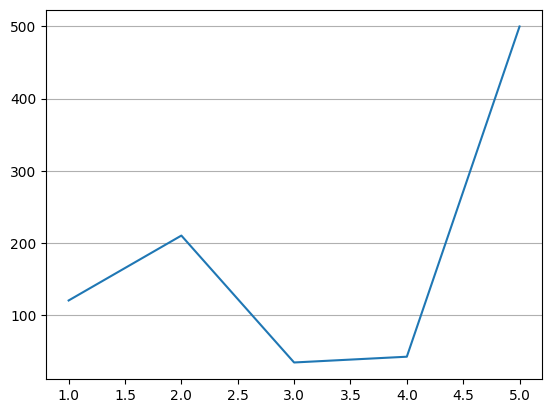

In [19]:
# Ejemplo
eje_x = [1, 2, 3, 4, 5]
eje_y = [120, 210, 34, 42, 500]

plt.plot(eje_x, eje_y)

plt.grid(axis='y')

plt.show()